# Student Performance Analysis - 03/11/2024

# Table of Content

* [1. Abstract](#1.-Abstract)
* [2. The Data](#2.-The-Data)
* [3. Data Cleaning, Preparing, and Basic Analysis](#3.-Data-Cleaning,-Preparing,-and-Basic-Analysis)
* [4. Multioutput Models](#4-Multioutput-Models)
* [5. Multiple linear regression model for single output](#5-Multiple-linear-regression-model-for-single-output)
* [6 Decision tree model for regression](#6.-Decision-tree-model-for-regression)
* [7 Comparison](#7.-Comparison)
* [8 Conclusion ](#8.-Conclusion)
    
    


# 1. Abstract 

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

First, the data set is cleaned and prepared for analysis. Then, two regression models are applied; multiple linear regression model and Decision tree model. The two models are then evaluated and compared using metrics like R^2 and Mean Squared Error.  




# 2. The Data
The data file used in this notebook was gathered from Kaggle https://www.kaggle.com/datasets/bhavikjikadara/student-study-performanceprediction

The data set includes nine(9) columns such as gender,race/ethnicity,parental level of education,and scores of maths, reading, and writing. 

Here are all the features included in the data set and a short description of them.

| Feature Name | Description |
| :---   | :----------- |
|gender | sex of students (Male/female) |
|race/ethnicity | ethnicity of students (Group A, B,C, D,E) |
|parental level of education | parents' final education(bachelor's degree,some college,master's degree,associate's degree,high school|
|lunch | having lunch before test (standard or free/reduced)|
|test preparation course | complete or not complete before test|
|math score|
|reading score|
|writing score|


## Quick view of results

Following are models' performance on the testing sets.

|      |  Model 1 - Multiple linear Regression | Model 2 - Decision tree     |
| :---        |    :----:   |          :---: |
|**Math_score prediction**|
| $R^2$ Testing set   | 0.878        |0.813  |
| MSE testing set   | 0.125        |0.190   |
| **reading_score prediction**|
| $R^2$ Testing set   | 0.926        |0.901   |
| MSE testing set   | 0.076       |0.010|
|**Writing_score prediction**|
| $R^2$ Testing set   | 0.949        |0.901   |
| MSE testing set   | 0.053       |0.104|

Apart from this prediction, I have also found the following insights from the data set, which can be useful information to improve students' performance. 

* Females do well in subjects like reading and writing, where as male students do well in math.
* students who belong to ethnicity group E are doing well where as group A ethinicity students show poor performance for all 3 subjects.   
* The students whose parents have a higer level of education like a master's degree are doing well in all three subjects where as students whose parents have some high school level of education show comparetively lower performance.
* Larger percentage of Students who did better than the average, took standard lunch. This fact is true for all three subjects. 
* For all three subjects, the students who completed the test preparation course show higher average scores than who did not. 



In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\indup\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#import data set as a dataframe
df = pd.read_csv('study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#all the columns seems usefull for analysis and there are no unsignificant columns such as ID

In [5]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#check if there are any outliers in the scores
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 3. Data Cleaning, Preparing, and Basic Analysis 

1. Remove unsignificant columns - there are no such columns like ID so all columns are kept and considered for analysis 
2. Handle missing Values and Duplicates
3. Handle outliers using data visualization
4. Checking the distribution of categorical features to identify important features before converting them to numerical. 
5. Convert Categorical data to Numerical data
6. Check Correlation matrix to check the dependance of the variables with other
7. Split the data into training and testing


## 3.2 Handle missing Values and Duplicates

In [7]:
#Handle missing values 
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#check if there are any duplicates
df.duplicated().sum()

0

## 3.3 Handle outliers using data visualization

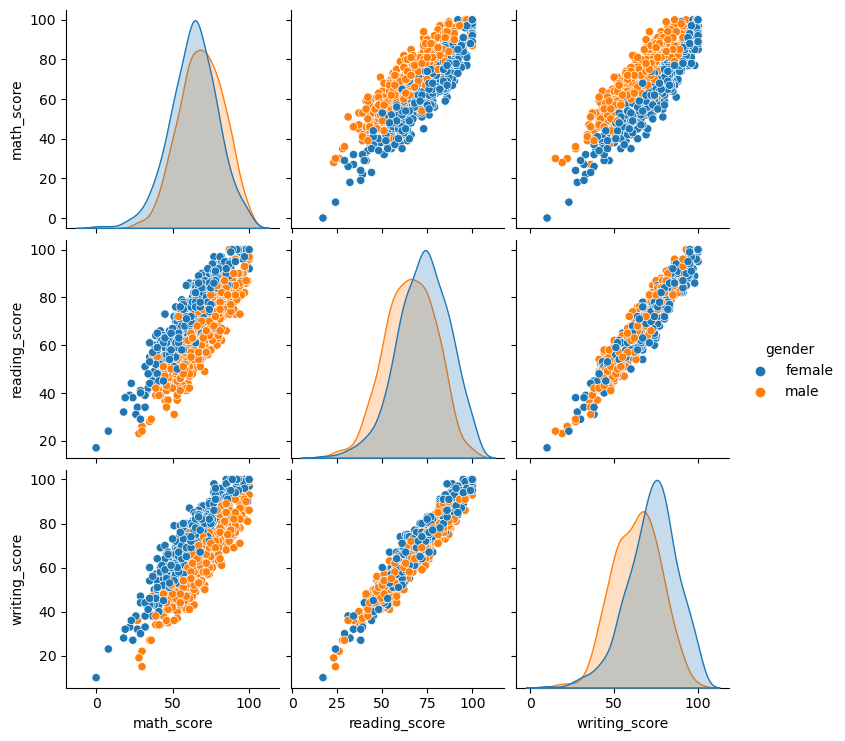

In [9]:
g = sns.pairplot(df ,hue='gender')
plt.show()

The scores features seem to have a linear relationship with each other. We can confirm this later by using the correlation heat map. The plots do not show any obvious outliers. Moreover, we see from the summary statistics of the dataframe that the scores data fall within the range [0, 100]. 

# Get each subject scores graphs for each gender (histograms?)

## 3.4 Distribution of features

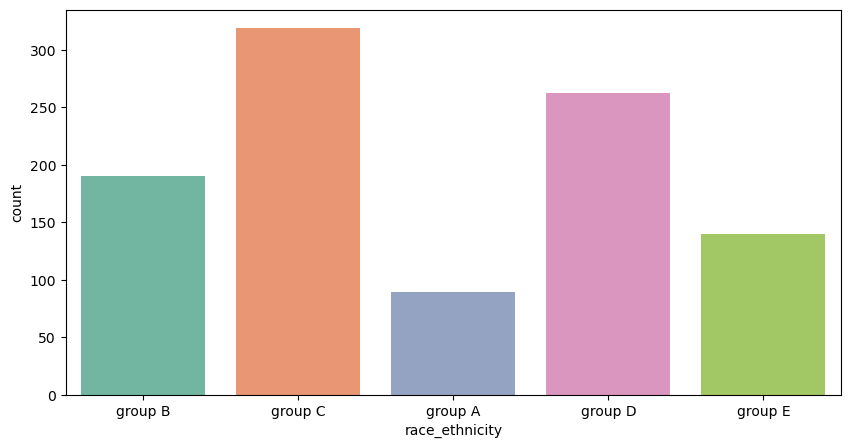

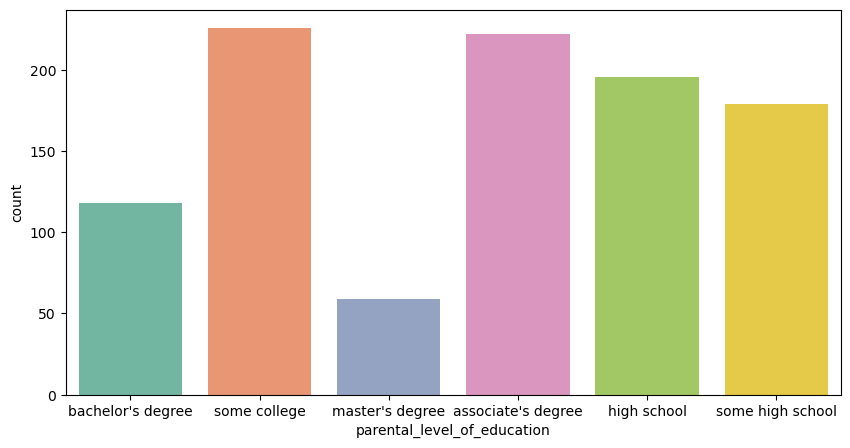

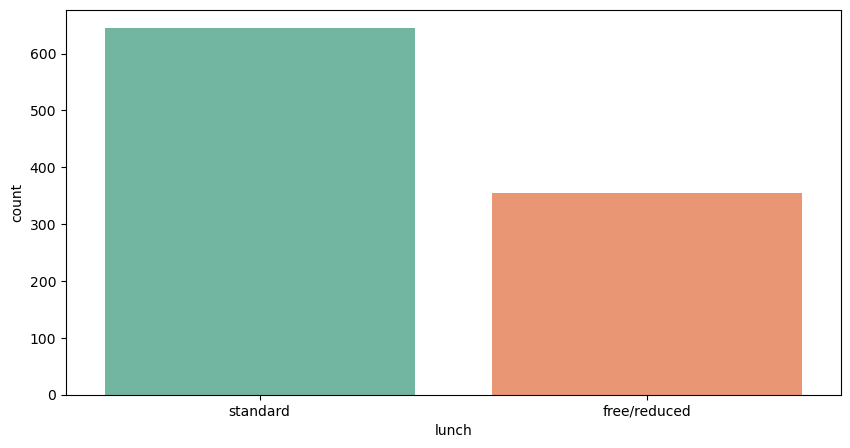

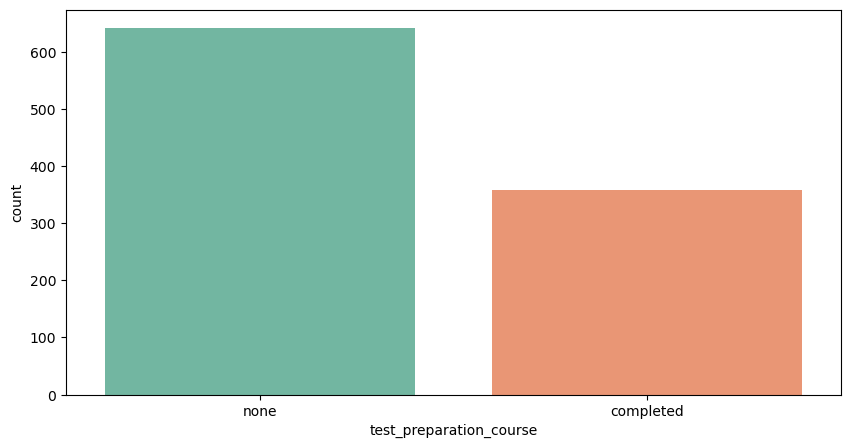

In [236]:
#distribution of features
features = ['race_ethnicity', 'parental_level_of_education','lunch','test_preparation_course']
for f in features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=f, data = df,palette = 'Set2')
    plt.show()

* most of the students belong to group C ethnic group. 

* most of the parents have some college degree or associate degree. smaller percentage have pursued a master's degree. 

* larger percentage of students have had standard lunch before the test. 

* Larger percentage of students have not completed the test preparation course. 

## 3.5 Get insights from data

In [22]:
df1 = df.copy()
df1['Average'] = df1[['math_score','reading_score','writing_score']].mean(axis=1)
df1

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [29]:
gender_counts_percentages = df1['gender'].value_counts()*100/1000
gender_counts_percentages 


female    51.8
male      48.2
Name: gender, dtype: float64

In [68]:
#average of each subject categorized into gender
l = ['math_score', 'reading_score','writing_score']
avg_scores = [0,0,0]

for i in range(3):
    avg_scores[i]=df1.groupby('gender')[l[i]].mean()
avg_scores

[gender
 female    63.633205
 male      68.728216
 Name: math_score, dtype: float64,
 gender
 female    72.608108
 male      65.473029
 Name: reading_score, dtype: float64,
 gender
 female    72.467181
 male      63.311203
 Name: writing_score, dtype: float64]

In [77]:
#count the males and females who got higher than the average for each subject
#average scores for each subject
avg = [df['math_score'].mean(),df['reading_score'].mean(),df['writing_score'].mean()]
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    d = df1[df1[l[i]] > avg[i]]
    dnew.append(d.groupby('gender')[l[i]].count()/d.shape[0]*100)
dnew


[gender
 female    44.827586
 male      55.172414
 Name: math_score, dtype: float64,
 gender
 female    61.988304
 male      38.011696
 Name: reading_score, dtype: float64,
 gender
 female    65.039062
 male      34.960938
 Name: writing_score, dtype: float64]

In [78]:
#count the students in each ethnicity group who got higher than the average for each subject
#average scores for each subject
avg = [df['math_score'].mean(),df['reading_score'].mean(),df['writing_score'].mean()]
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    d = df1[df1[l[i]] > avg[i]]
    dnew.append(d.groupby('race_ethnicity')[l[i]].count()/d.shape[0]*100)
dnew


[race_ethnicity
 group A     6.288032
 group B    15.821501
 group C    28.397566
 group D    29.614604
 group E    19.878296
 Name: math_score, dtype: float64,
 race_ethnicity
 group A     6.432749
 group B    16.569201
 group C    31.773879
 group D    27.875244
 group E    17.348928
 Name: reading_score, dtype: float64,
 race_ethnicity
 group A     6.054688
 group B    16.210938
 group C    31.054688
 group D    29.492188
 group E    17.187500
 Name: writing_score, dtype: float64]

In [79]:
#count the students in each ethnicity group who got lower than the average for each subject 
#average scores for each subject
avg = [df['math_score'].mean(),df['reading_score'].mean(),df['writing_score'].mean()]
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    d = df1[df1[l[i]] < avg[i]]
    dnew.append(d.groupby('race_ethnicity')[l[i]].count()/d.shape[0]*100)
dnew


[race_ethnicity
 group A    11.439842
 group B    22.090730
 group C    35.305720
 group D    22.879684
 group E     8.284024
 Name: math_score, dtype: float64,
 race_ethnicity
 group A    11.498973
 group B    21.560575
 group C    32.032854
 group D    24.435318
 group E    10.472279
 Name: reading_score, dtype: float64,
 race_ethnicity
 group A    11.885246
 group B    21.926230
 group C    32.786885
 group D    22.745902
 group E    10.655738
 Name: writing_score, dtype: float64]

In [96]:
#count the males and females who got lower than the average for each subject
#average scores for each subject
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    #d = df1[l[i]]
    dnew.append(df1.groupby('race_ethnicity')[l[i]].mean())
dnew

[race_ethnicity
 group A    61.629213
 group B    63.452632
 group C    64.463950
 group D    67.362595
 group E    73.821429
 Name: math_score, dtype: float64,
 race_ethnicity
 group A    64.674157
 group B    67.352632
 group C    69.103448
 group D    70.030534
 group E    73.028571
 Name: reading_score, dtype: float64,
 race_ethnicity
 group A    62.674157
 group B    65.600000
 group C    67.827586
 group D    70.145038
 group E    71.407143
 Name: writing_score, dtype: float64]

In [ ]:
# average score for each subject based on the parent level of education
#average scores for each subject
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    #d = df1[l[i]]
    dnew.append(df1.groupby('parental_level_of_education')[l[i]].mean())
dnew

In [81]:
#count the students in each group of parent level fof education who got higher than the average for each subject
#average scores for each subject
avg = [df['math_score'].mean(),df['reading_score'].mean(),df['writing_score'].mean()]
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    d = df1[df1[l[i]] > avg[i]]
    dnew.append(d.groupby('parental_level_of_education')[l[i]].count()/d.shape[0]*100)
dnew


[parental_level_of_education
 associate's degree    22.920892
 bachelor's degree     13.387424
 high school           16.024341
 master's degree        7.099391
 some college          24.137931
 some high school      16.430020
 Name: math_score, dtype: float64,
 parental_level_of_education
 associate's degree    24.561404
 bachelor's degree     14.035088
 high school           15.399610
 master's degree        7.407407
 some college          23.001949
 some high school      15.594542
 Name: reading_score, dtype: float64,
 parental_level_of_education
 associate's degree    24.023438
 bachelor's degree     14.843750
 high school           13.476562
 master's degree        7.812500
 some college          24.023438
 some high school      15.820312
 Name: writing_score, dtype: float64]

In [90]:
#count the students based on the lunch category who got higher than the average for each subject
#average scores for each subject
avg = [df['math_score'].mean(),df['reading_score'].mean(),df['writing_score'].mean()]
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    d = df1[df1[l[i]] > avg[i]]
    dnew.append(d.groupby('lunch')[l[i]].count()/d.shape[0]*100)
dnew

[lunch
 free/reduced    22.312373
 standard        77.687627
 Name: math_score, dtype: float64,
 lunch
 free/reduced    26.705653
 standard        73.294347
 Name: reading_score, dtype: float64,
 lunch
 free/reduced    26.171875
 standard        73.828125
 Name: writing_score, dtype: float64]

In [95]:
#average scores for students who did the test preparation and who did not
l = ['math_score', 'reading_score','writing_score']
dnew = []

for i in range(3):
    dnew.append(df1.groupby('test_preparation_course')[l[i]].mean())
dnew

[test_preparation_course
 completed    69.695531
 none         64.077882
 Name: math_score, dtype: float64,
 test_preparation_course
 completed    73.893855
 none         66.534268
 Name: reading_score, dtype: float64,
 test_preparation_course
 completed    74.418994
 none         64.504673
 Name: writing_score, dtype: float64]

## 3.6 Convert Categorical data to Numerical data

In [237]:
#get unique values in each column
df.race_ethnicity.unique()


array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [238]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [239]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [240]:
df.test_preparation_course.unique()

array(['none', 'completed'], dtype=object)

In [241]:
#the columns race_etnicity, lunch, test_preparation_course have binary outputs and therefore, can be converted to binary data type
df1 = pd.get_dummies(df["gender"])
df2 = pd.get_dummies(df["lunch"])
df3 = pd.get_dummies(df["test_preparation_course"])
df4 = pd.get_dummies(df["race_ethnicity"])
df = pd.concat((df,df1,df2,df3,df4),axis=1)


In [242]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,female,male,free/reduced,standard,completed,none,group A,group B,group C,group D,group E
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,0,1,0,1,0,1,0,0,0
1,female,group C,some college,standard,completed,69,90,88,1,0,0,1,1,0,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,0,1,0,1,0,1,0,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,1,0,0,1,1,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,0,0,1,1,0,0,0,0,0,1
996,male,group C,high school,free/reduced,none,62,55,55,0,1,1,0,0,1,0,0,1,0,0
997,female,group C,high school,free/reduced,completed,59,71,65,1,0,1,0,1,0,0,0,1,0,0
998,female,group D,some college,standard,completed,68,78,77,1,0,0,1,1,0,0,0,0,1,0


In [243]:
df.drop(["race_ethnicity","gender","lunch","test_preparation_course","male","free/reduced","none"],axis=1,inplace=True)

In [244]:
df.rename(columns={"female":"gender_Female", "standard":"lunch_standard","completed":"Test_prep_completed","group A":"race_ethnicity_A","group B":"race_ethnicity_B","group C":"race_ethnicity_C","group D":"race_ethnicity_D","group E":"race_ethnicity_E" })

,parental_level_of_education,math_score,reading_score,writing_score,gender_Female,lunch_standard,Test_prep_completed,race_ethnicity_A,race_ethnicity_B,race_ethnicity_C,race_ethnicity_D,race_ethnicity_E
0,bachelor's degree,72,72,74,1,1,0,0,1,0,0,0
1,some college,69,90,88,1,1,1,0,0,1,0,0
2,master's degree,90,95,93,1,1,0,0,1,0,0,0
3,associate's degree,47,57,44,0,0,0,1,0,0,0,0
4,some college,76,78,75,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,88,99,95,1,1,1,0,0,0,0,1
996,high school,62,55,55,0,0,0,0,0,1,0,0
997,high school,59,71,65,1,0,1,0,0,1,0,0
998,some college,68,78,77,1,1,1,0,0,0,1,0


In [245]:
#the column parental_level_of_education has 6 different values,hence we can categorize them accoding to the importance of education 0 beingh the least and 5 being the highest importance. 
mapping = {'some high school':0, 'high school':1,  'some college':2,"associate's degree":3, "bachelor's degree":4,  "master's degree":5}
df['parental_level_of_education']=df['parental_level_of_education'].map(mapping)


In [246]:
df

,parental_level_of_education,math_score,reading_score,writing_score,female,standard,completed,group A,group B,group C,group D,group E
0,4,72,72,74,1,1,0,0,1,0,0,0
1,2,69,90,88,1,1,1,0,0,1,0,0
2,5,90,95,93,1,1,0,0,1,0,0,0
3,3,47,57,44,0,0,0,1,0,0,0,0
4,2,76,78,75,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,88,99,95,1,1,1,0,0,0,0,1
996,1,62,55,55,0,0,0,0,0,1,0,0
997,1,59,71,65,1,0,1,0,0,1,0,0
998,2,68,78,77,1,1,1,0,0,0,1,0


In [247]:
#normalize test scores
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply Z-score normalization to selected columns
df[["math_score","reading_score","writing_score"]] = scaler.fit_transform(df[["math_score","reading_score","writing_score"]])
df

,parental_level_of_education,math_score,reading_score,writing_score,female,standard,completed,group A,group B,group C,group D,group E
0,4,0.390024,0.193999,0.391492,1,1,0,0,1,0,0,0
1,2,0.192076,1.427476,1.313269,1,1,1,0,0,1,0,0
2,5,1.577711,1.770109,1.642475,1,1,0,0,1,0,0,0
3,3,-1.259543,-0.833899,-1.583744,0,0,0,1,0,0,0,0
4,2,0.653954,0.605158,0.457333,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,1.445746,2.044215,1.774157,1,1,1,0,0,0,0,1
996,1,-0.269803,-0.970952,-0.859491,0,0,0,0,0,1,0,0
997,1,-0.467751,0.125472,-0.201079,1,0,1,0,0,1,0,0
998,2,0.126093,0.605158,0.589015,1,1,1,0,0,0,1,0


In [248]:
df

,parental_level_of_education,math_score,reading_score,writing_score,female,standard,completed,group A,group B,group C,group D,group E
0,4,0.390024,0.193999,0.391492,1,1,0,0,1,0,0,0
1,2,0.192076,1.427476,1.313269,1,1,1,0,0,1,0,0
2,5,1.577711,1.770109,1.642475,1,1,0,0,1,0,0,0
3,3,-1.259543,-0.833899,-1.583744,0,0,0,1,0,0,0,0
4,2,0.653954,0.605158,0.457333,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,1.445746,2.044215,1.774157,1,1,1,0,0,0,0,1
996,1,-0.269803,-0.970952,-0.859491,0,0,0,0,0,1,0,0
997,1,-0.467751,0.125472,-0.201079,1,0,1,0,0,1,0,0
998,2,0.126093,0.605158,0.589015,1,1,1,0,0,0,1,0


## 3.6 Corrlation matrix

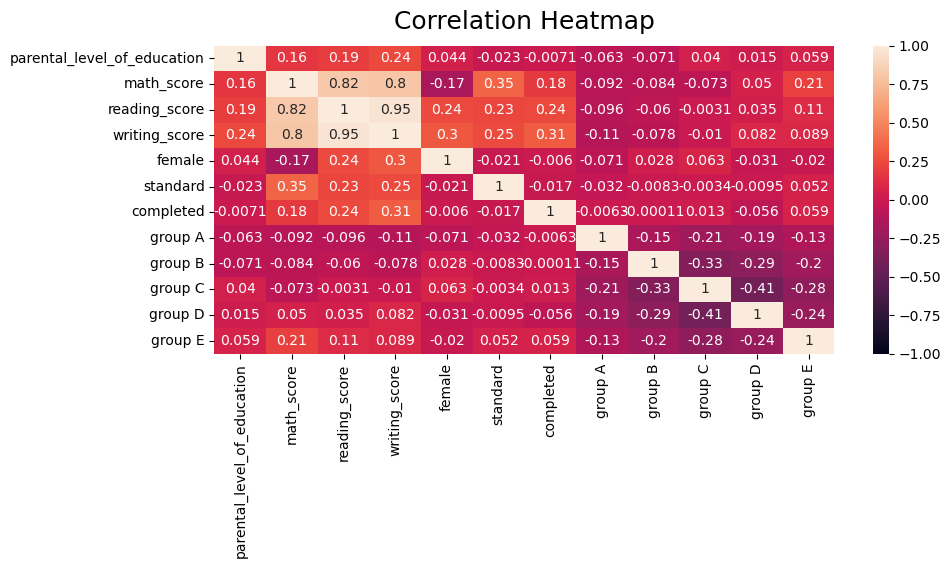

In [249]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

The correlation matrix shows high correlation between each scores features. 

Now that the data cleaning and preparation is complete, we can use multiple linear regression to predict math, reading, and writing scores based on the gender, lunch, exam preparation, and ethnic group. 


## 3.7 Split the data into training and testing

We first apply multioutput linear regression model. Therefore, we separate the data so that the Y variables are the three columns maths, reading and writing scores, and other columns as independent X variable.  

In [250]:
#separet X and Y variables
X = df.drop(['math_score', 'reading_score','writing_score'], axis=1)
Y = df[['math_score', 'reading_score','writing_score']]
print(X.shape, Y.shape)

(1000, 9) (1000, 3)


In [251]:
#split the data into training(70%) and testing(30%). 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

# 4 Multioutput Models 

## 4.1 Linear Regression

In [268]:
# linear regression for multioutput regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fit model
reg = model.fit(X_train, Y_train)
# make a prediction on train data
Y_train_pred= model.predict(X_train)
# make a prediction on test data
Y_test_pred = model.predict(X_test)
print(mean_squared_error(Y_test,Y_test_pred))
print(r2_score(Y_test,Y_test_pred))

0.7281041864093595
0.28919644395548033


## 4.2 MultiOutputRegressor

In [265]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor
rgr = MultiOutputRegressor(estimator=SGDRegressor(),n_jobs=-1)
rgr.fit(X_train, Y_train)
Y_predictrgr = rgr.predict(X_test)
Y_predictrgr
print(mean_squared_error(Y_test,Y_predictrgr))
print(r2_score(Y_test,Y_predictrgr))

0.7331888571028795
0.28423162875856356


## 4.3 RegressorChain

In [266]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge

rgr = RegressorChain(base_estimator=Ridge(alpha=1),order=[0,1,2])
rgr.fit(X_train,Y_train)
Y_predict = rgr.predict(X_test)
print(mean_squared_error(Y_test,Y_predict))
print(r2_score(Y_test,Y_predict))

0.7279778765137773
0.2893192014298671


## 4.4 Evaluate Model performance. What's next?

In [185]:
# Evaluate model performance R^2 score
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f'R-squared on Train Set using Regression: {r2_train}')
print(f'R-squared on Test Set using Regression: {r2_test}')

R-squared on Train Set using Regression: 0.9466740377342276
R-squared on Test Set using Regression: 0.9487521923297297


In [186]:
# Evaluate model performance MSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print(f'MSE on Train Set using Regression: {mse_train}')
print(f'MSE on Test Set using Regression: {mse_test}')

MSE on Train Set using Regression: 0.05236271546373172
MSE on Test Set using Regression: 0.05336950547774491


By looking at $R^2$ and MSE values we see that the above models are not doing well on predicting values on both training and testing sets. This could be due to several reasons.

* Complexity of the Relationships:
Multi-output regression models assume that there is a joint relationship between the input variables and all output variables. If the relationships between inputs and outputs are complex and interdependent, a single model may struggle to capture them all accurately.

* Correlation Among Output Variables:
If the three output variables are highly correlated, the multi-output model might face challenges in distinguishing between the effects of individual input features on each output variable. This can lead to a decrease in model performance.

* Data Imbalance:
If the variability in the three output variables is significantly different, the model may prioritize predicting the variable with higher variance at the expense of others, resulting in lower R^2 scores for the less variable outputs.

* Model Complexity and Overfitting:
Multi-output models can be more complex than single-output models, and in some cases, they may be prone to overfitting. If your dataset is limited, the multi-output model may overfit the noise in the data, leading to a lower generalization performance.

We observed from the correlation matrix that the output variables are highly correlated. This can be the reason for the poor performance of the model. 

To overcome this, I decided to solve three models for each output variables. 

# 5 Multiple linear regression model for single output

In [187]:
l = ['math_score', 'reading_score','writing_score']
r2_train = []
r2_test = []
mse_train = []
mse_test = []

for i in range(3):
    X = df.drop([l[i]], axis=1)
    Y = df[l[i]]
    #split the data into training(70%) and testing(30%). 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    modelR = LinearRegression()
    # fit model
    reg = modelR.fit(X_train, Y_train)
    # make a prediction on train data
    Y_train_predR= modelR.predict(X_train)
    # make a prediction on test data
    Y_test_predR = modelR.predict(X_test)
    r2_train.append(r2_score(Y_train, Y_train_predR))
    r2_test.append(r2_score(Y_test, Y_test_predR))
    mse_train.append(mean_squared_error(Y_train, Y_train_predR))
    mse_test.append(mean_squared_error(Y_test, Y_test_predR))

print(f'R-squared on Train Set using Regression for math_score, reading_score, and writing_score: {r2_train}')
print(f'R-squared on Test Set using Regression for math_score, reading_score, and writing_score: {r2_test}')
print(f'MSE on Train Set using Regression for math_score, reading_score, and writing_score: {mse_train}')
print(f'MSE on Test Set using Regression for math_score, reading_score, and writing_score: {mse_test}')
    

R-squared on Train Set using Regression for math_score, reading_score, and writing_score: [0.8750318288749066, 0.9258611124428126, 0.9466740377342276]
R-squared on Test Set using Regression for math_score, reading_score, and writing_score: [0.8778884973224854, 0.9250742905261092, 0.9487521923297297]
MSE on Train Set using Regression for math_score, reading_score, and writing_score: [0.1237020547590324, 0.07373563375989187, 0.05236271546373172]
MSE on Test Set using Regression for math_score, reading_score, and writing_score: [0.12470848995784176, 0.07587275791367866, 0.05336950547774491]


# 6 Decision tree model for regression

In [208]:
l = ['math_score', 'reading_score','writing_score']
r2_train = []
r2_test = []
mse_train = []
mse_test = []

for i in range(3):
    X = df.drop([l[i]], axis=1)
    Y = df[l[i]]
    #split the data into training(70%) and testing(30%). 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    # decision tree for multioutput regression
    from sklearn.datasets import make_regression
    from sklearn.tree import DecisionTreeRegressor
    # define model
    modelD = DecisionTreeRegressor(max_depth=5)#, min_samples_leaf=5,min_samples_split=11)
    # fit model
    modelD.fit(X_train, Y_train)
    # make a prediction on train data
    Y_train_predD = modelD.predict(X_train)
    # make a prediction on test data
    Y_test_predD = modelD.predict(X_test)
    r2_train.append(r2_score(Y_train, Y_train_predD))
    r2_test.append(r2_score(Y_test, Y_test_predD))
    mse_train.append(mean_squared_error(Y_train, Y_train_predD))
    mse_test.append(mean_squared_error(Y_test, Y_test_predD))
print(f'R-squared on Train Set using Decision tree for math_score, reading_score, and writing_score: {r2_train}')
print(f'R-squared on Test Set using Decision tree for math_score, reading_score, and writing_score: {r2_test}')
print(f'MSE on Train Set using Decision tree for math_score, reading_score, and writing_score: {mse_train}')
print(f'MSE on Test Set using Decision tree for math_score, reading_score, and writing_score: {mse_test}')
    

R-squared on Train Set using Decision tree for math_score, reading_score, and writing_score: [0.862507085087592, 0.9274396265556051, 0.9303878086880434]
R-squared on Test Set using Decision tree for math_score, reading_score, and writing_score: [0.8134728438845555, 0.9013047996006576, 0.9005845692469467]
MSE on Train Set using Decision tree for math_score, reading_score, and writing_score: [0.1360999039703356, 0.0721657054491129, 0.06835476026307852]
MSE on Test Set using Decision tree for math_score, reading_score, and writing_score: [0.19049409322821323, 0.09994269123004743, 0.10353130440788408]


## 7 Comparison

Below I summarize the performance of both models for predicting math, reading and writing scores. 



Math_score prediction:

|      |  Model 1 - Multiple linear Regression | Model 2 - Decision tree     |
| :---        |    :----:   |          :---: |
|    $R^2$ Training set  | 0.875       | 0.863   |
| $R^2$ Testing set   | 0.878        |0.813  |
|   MSE Training set  | 0.124      | 0.136  |
| MSE testing set   | 0.125        |0.190   |

reading_score prediction:

|      |  Model 1 - Multiple linear Regression | Model 2 - Decision tree     |
| :---        |    :----:   |          :---: |
|    $R^2$ Training set  | 0.926       | 0.927   |
| $R^2$ Testing set   | 0.926        |0.901   |
|   MSE Training set  | 0.074      | 0.072  |
| MSE testing set   | 0.076       |0.010|

Writing_score prediction:

|      |  Model 1 - Multiple linear Regression | Model 2 - Decision tree     |
| :---        |    :----:   |          :---: |
|    $R^2$ Training set  | 0.987       | 0.930   |
| $R^2$ Testing set   | 0.949        |0.901   |
|   MSE Training set  | 0.052      | 0.068  |
| MSE testing set   | 0.053       |0.104|





# 8 Conclusion

Both models seem to do well on predicting all three scores. 

**insights based on gender**

* In the data set, 51.8% are female and 48.2% are male. 

* Average math_score for female and male students are 64% and 69% which implies male students have higher average score for math than female students

* Average reading_score for female and male students are 73% and 65% which implies female students have higher average score for reading than male students

* Average writing_score for female and male students are 72% and 63% which implies female students have higher average score for writing than male students

* Among the students who got higher than average math_score 45% are female and 55% are male.

* Among the students who got higher than average reading_score 62% are female and 38% are male. 

* Among the students who got higher than average writing_score 65% are female and 35% are male.  

* Overall, male students show better performance for subjects like math where as femle students show better performance for subjects like reading and writing.

**insights based on ethnicity group**

* Among the students who got above average scores for math, largest portion belongs to group D ethnicity group and smallest portion belongs to group A

* Among the students who got above average scores for reading, largest portion belongs to group C ethnicity group and smalles portion belongs to group A 

* Among the students who got above average scores for writing, largest portion belongs to group C ethnicity group and smalles portion belongs to group A 

* When looking at the data set for students who took below average scores, many of them belong to group C ethnicity group

However, this is kind of obvious because most of the students belong to group C and D ethnicity groups. 

* I grouped the students into ethniciy groups and looked at the average for each group for all subjects. For all thre subjects, Group E shows the highest average and group A shows the smallest average. Also when looking at the students who took below average scores, less percentage belongs to group E than A. But when comparing the distributions for ethnicity groups many students belong to group E than A. 

* Overall, students who belong to ethnicity group E are doing well where as group A ethinicity students show poor performance for all 3 subjects.   

**insights based on Parents' level of education**

* The students whose parents have a higer level of education like a master's degree are doing well in all three subjects where as students whose parents have some high school level of education show comparetively lower performance.

**insights based on lunch**

* Larger percentage of Students who did better than the average, took standard lunch. This fact is true for all three subjects. 


**insights based on test preparation course**

* For all three subjects, the students who completed the test preparation course show higher average scores than who did not. 
